In [1]:
import pandas as pd

In [2]:
# pert_abuse = pd.read_csv("results/pert_porn_scores.csv")
# cols = []
# for column in pert_abuse.columns:
#     if 'score' in column:
#         cols.append(column)

# pert_abuse = pert_abuse[cols]
# new_cols = []
# threshold = 0.2

# for col in cols:
#     if col == "score":
#         continue
        
#     newcol = f"{col}_res".replace("_score", "")
#     new_cols.append(newcol)
    
#     (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
#     pert_abuse[newcol] = pert_abuse[newcol].astype(int)
#     print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")
# pert_abuse.to_csv("results/pert_porn_results.csv", index=False)

In [3]:
# pert_abuse = pd.read_csv("results/pert_abuse_scores.csv")
# cols = []
# for column in pert_abuse.columns:
#     if 'score' in column:
#         cols.append(column)

# pert_abuse = pert_abuse[cols]
# new_cols = []
# threshold = 0.20

# for col in cols:
#     if col == "score":
#         continue
        
#     newcol = f"{col}_res".replace("_score", "")
#     new_cols.append(newcol)
    
#     #     pert_abuse[newcol] = pert_abuse[col] <= threshold
#     pert_abuse[newcol] = (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
#     pert_abuse[newcol] = pert_abuse[newcol].astype(int)
#     print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")

# pert_abuse.to_csv("results/pert_abuse_results.csv", index=False)

In [4]:
# pert_abuse = pd.read_csv("results/pert_spam_scores.csv")
# cols = []
# for column in pert_abuse.columns:
#     if 'score' in column:
#         cols.append(column)

# pert_abuse = pert_abuse[cols]
# new_cols = []
# threshold = 0.01

# for col in cols:
#     if col == "score":
#         continue
        
#     newcol = f"{col}_res".replace("_score", "")
#     new_cols.append(newcol)
    
#     pert_abuse[newcol] = (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
#     pert_abuse[newcol] = pert_abuse[newcol].astype(int)
#     print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")

# pert_abuse.to_csv("results/pert_spam_results.csv", index=False)

In [5]:
# new_cols = []
# threshold = 0.05

# for col in cols:
#     if col == "score":
#         continue
        
#     newcol = f"{col}_res".replace("_score", "")
#     new_cols.append(newcol)
    
#     pert_abuse[newcol] = (abs(pert_abuse[col] - pert_abuse['score']) / pert_abuse['score']) >= threshold
#     pert_abuse[newcol] = pert_abuse[newcol].astype(int)
#     print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")

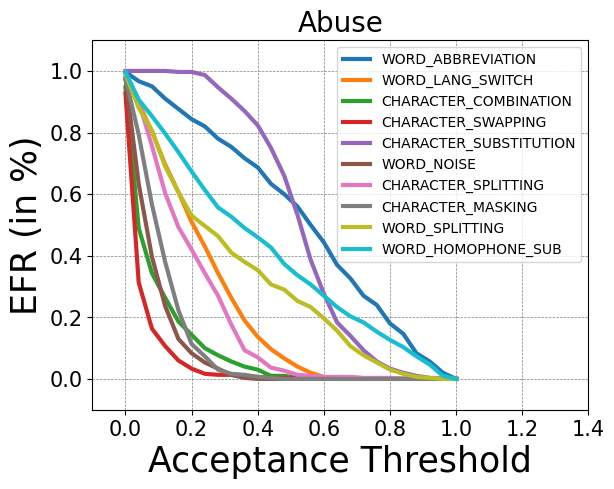

In [6]:
pert_abuse = pd.read_csv("results/pert_abuse_scores.csv")
cols = []
for column in pert_abuse.columns:
    if 'score' in column:
        cols.append(column)

pert_abuse = pert_abuse[cols]
new_cols = set()
thresholds = [0.04 * i for i in range(0, 26)]
results = []

for threshold in thresholds:
    result = {"threshold": threshold}
    for col in cols:
        if col == "score":
            continue

        newcol = f"{col}_res".replace("_score", "")
        newcol = col.replace("_score", "")
        new_cols.add(newcol)

        # pert_abuse[newcol] = pert_abuse[col] <= threshold
        pert_abuse[newcol] = (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
        pert_abuse[newcol] = pert_abuse[newcol].astype(int)
        # print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")
        result[newcol] = pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]

    results.append(result)

# pert_abuse.to_csv("results/pert_abuse_results.csv", index=False)
df = pd.DataFrame(results)

import matplotlib.pyplot as plt
for col in new_cols:
    plt.plot(df['threshold'], df[col], label=col, linewidth=3)

# Add labels and a legend
plt.xlabel('Acceptance Threshold', fontsize=25)
plt.ylabel('EFR (in %)', fontsize=25)
plt.legend(fontsize=10, loc="upper right")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Abuse', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-0.1, 1.4)
plt.ylim(-0.1, 1.1)
plt.show()

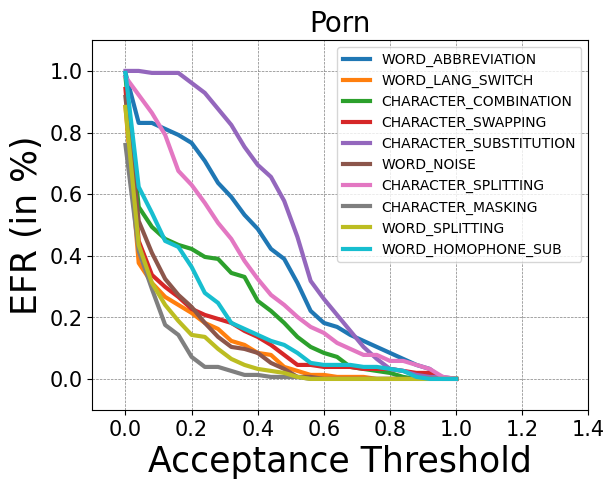

In [7]:
pert_abuse = pd.read_csv("results/pert_porn_scores.csv")
cols = []
for column in pert_abuse.columns:
    if 'score' in column:
        cols.append(column)

pert_abuse = pert_abuse[cols]
new_cols = set()
thresholds = [0.04 * i for i in range(0, 26)]
results = []

for threshold in thresholds:
    result = {"threshold": threshold}
    for col in cols:
        if col == "score":
            continue

        newcol = f"{col}_res".replace("_score", "")
        newcol = col.replace("_score", "")
        new_cols.add(newcol)

        # pert_abuse[newcol] = pert_abuse[col] <= threshold
        pert_abuse[newcol] = (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
        pert_abuse[newcol] = pert_abuse[newcol].astype(int)
        # print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")
        result[newcol] = pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]

    results.append(result)

# pert_abuse.to_csv("results/pert_porn_results.csv", index=False)
df = pd.DataFrame(results)
# print(df.head(3))

import matplotlib.pyplot as plt
for col in new_cols:
    plt.plot(df['threshold'], df[col], label=col, linewidth=3)

# Add labels and a legend
plt.xlabel('Acceptance Threshold', fontsize=25)
plt.ylabel('EFR (in %)', fontsize=25)
plt.legend(fontsize=10, loc="upper right")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Porn', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-0.1, 1.4)
plt.ylim(-0.1, 1.1)
plt.show()

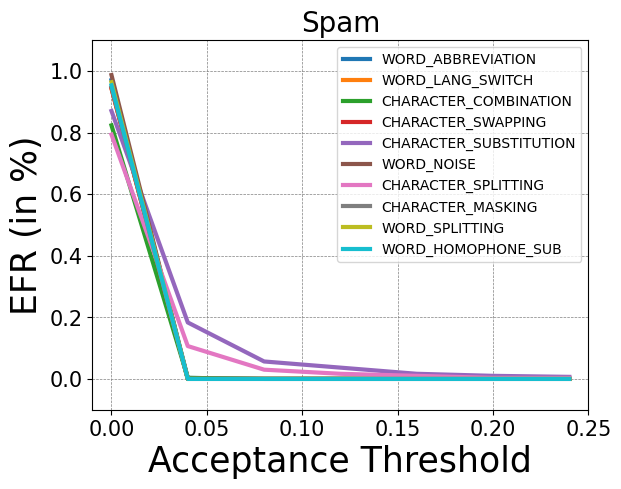

In [8]:
pert_abuse = pd.read_csv("results/pert_spam_scores.csv")
cols = []
for column in pert_abuse.columns:
    if 'score' in column:
        cols.append(column)

pert_abuse = pert_abuse[cols]
new_cols = set()
thresholds = [0.04 * i for i in range(0, 7)]
results = []

for threshold in thresholds:
    result = {"threshold": threshold}
    for col in cols:
        if col == "score":
            continue

        newcol = f"{col}_res".replace("_score", "")
        newcol = col.replace("_score", "")
        new_cols.add(newcol)

        # pert_abuse[newcol] = pert_abuse[col] <= threshold
        pert_abuse[newcol] = (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
        pert_abuse[newcol] = pert_abuse[newcol].astype(int)
        # print(f"{newcol} EFR = {pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]}")
        result[newcol] = pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0]

    results.append(result)

# pert_abuse.to_csv("results/pert_porn_results.csv", index=False)
df = pd.DataFrame(results)
# print(df.head(3))

import matplotlib.pyplot as plt
for col in new_cols:
    plt.plot(df['threshold'], df[col], label=col, linewidth=3)

# Add labels and a legend
plt.xlabel('Acceptance Threshold', fontsize=25)
plt.ylabel('EFR (in %)', fontsize=25)
plt.legend(fontsize=10, loc="upper right")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Spam', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-0.01, 0.25)
plt.ylim(-0.1, 1.1)
plt.show()

In [10]:
pert_abuse = pd.read_csv("results/pert_abuse_scores.csv")
cols = []
for column in pert_abuse.columns:
    if 'score' in column:
        cols.append(column)

pert_abuse = pert_abuse[cols]
new_cols = []
threshold = 0.20

for col in cols:
    if col == "score":
        continue
        
    newcol = f"{col}_res".replace("_score", "")
    new_cols.append(newcol)
    
    pert_abuse[newcol] = (pert_abuse['score'] - pert_abuse[col]) / pert_abuse['score'] >= threshold
    pert_abuse[newcol] = pert_abuse[newcol].astype(int)
    print(f"{newcol} EFR = {round(pert_abuse[pert_abuse[newcol] == 1].shape[0]/pert_abuse.shape[0], 4) * 100}")
# pert_abuse.to_csv("results/pert_porn_results.csv", index=False)

CHARACTER_COMBINATION_res EFR = 14.330000000000002
CHARACTER_MASKING_res EFR = 11.33
CHARACTER_SPLITTING_res EFR = 42.0
CHARACTER_SUBSTITUTION_res EFR = 99.67
CHARACTER_SWAPPING_res EFR = 3.3300000000000005
WORD_ABBREVIATION_res EFR = 84.33
WORD_HOMOPHONE_SUB_res EFR = 67.33
WORD_LANG_SWITCH_res EFR = 51.0
WORD_NOISE_res EFR = 8.33
WORD_SPLITTING_res EFR = 53.0
